In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display, stanford_mir
plt.rcParams['figure.figsize'] = (14,5)

[&larr; Back to Index](index.html)

# K-Nearest Neighbor

We can appreciate why we need additional intelligence in our systems -- heuristics don't go very far in the world of complex audio signals.  We'll be using scikit-learn's implementation of the k-NN algorithm for our work here.  It proves be a straightforward and easy-to-use implementation.  The steps and skills of working with one classifier will scale nicely to working with other, more complex classifiers.

## Training Data

Let's begin by loading some training data. We will use the following shortcut:

In [2]:
training_features, training_labels, scaler = stanford_mir.get_features(collection="drum_samples_train")

Show the training labels. `0` is a kick drum, and `1` is a snare drum.

In [3]:
print training_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


Plot the training data:

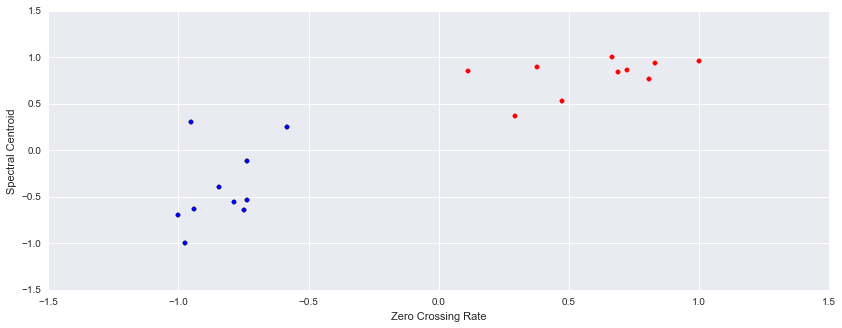

In [4]:
plt.scatter(training_features[:10,0], training_features[:10,1])
plt.scatter(training_features[10:,0], training_features[10:,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

## Test Data

Compute features from a test data set of 30 kick drum samples and 30 snare drum samples. We will re-use the `MinMaxScaler` used during training.

In [6]:
test_features, test_labels, _ = stanford_mir.get_features(collection="drum_samples_test", scaler=scaler)

Directory drum_samples_test already exists.


Show the test labels:

In [7]:
print test_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


Plot the test feature vectors. Note that this uses the same scaling function used during training. Therefore, some test feature vectors may exceed the range [-1, 1].

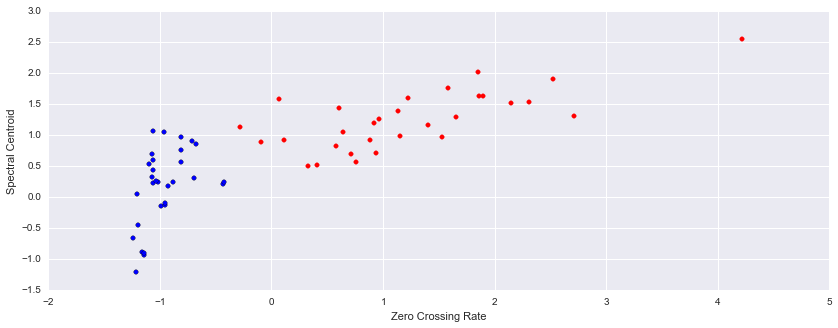

In [18]:
plt.scatter(test_features[test_labels==0,0], test_features[test_labels==0,1])
plt.scatter(test_features[test_labels==1,0], test_features[test_labels==1,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

## Building the K-NN Model

Build a k-NN model for the snare drums using scikit.learn's [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class.

In [19]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

To train a scikit-learn classifier, use the classifier object's `fit` method:

In [20]:
model.fit(training_features, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

To test the classifier on a set of (test) feature vectors, use the `predict` method:

In [21]:
model.predict(test_features)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Evaluate the model accuracy on the test data.

In [22]:
model.score(test_features, test_labels)

1.0

[&larr; Back to Index](index.html)